In [1]:
# Importing necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image
import warnings
warnings.filterwarnings('ignore')

# Data Preparation

In [3]:
# Data Augmentation for Training Set
# This is applied to prevent overfitting by generating diverse variations of the training data.
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Rescaling images to a range of 0-1
    shear_range=0.2,  # Random shear transformations
    zoom_range=0.2,   # Random zoom
    horizontal_flip=True  # Random horizontal flip
)

In [4]:
# Loading the training dataset from the specified directory
training_set = train_datagen.flow_from_directory(
    r"E:\Vegetable\Vegetable Images\train",  # Directory path to the training set
    target_size=(150, 150),  # Resizing images to 150x150 pixels
    batch_size=32,  # Batch size for training
    class_mode='categorical'  # Categorical labels for multi-class classification
)

Found 15000 images belonging to 15 classes.


In [5]:
# Validation data (no augmentation, only rescaling)
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_set = validation_datagen.flow_from_directory(
    r"E:\Vegetable\Vegetable Images\validation",  # Directory path to the validation set
    target_size=(150, 150),  # Resizing images
    batch_size=32,  # Batch size
    class_mode='categorical'  # Categorical labels
)

Found 3000 images belonging to 15 classes.


In [6]:
# Test data (no augmentation, only rescaling)
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(
    r"E:\Vegetable\Vegetable Images\test",  # Directory path to the test set
    target_size=(150, 150),  # Resizing images
    batch_size=32,  # Batch size
    class_mode='categorical'  # Categorical labels
)

Found 3000 images belonging to 15 classes.


# Model Architecture

In [8]:
# Building the Convolutional Neural Network (CNN) model

model = models.Sequential([
    # Convolutional Layer 1 - Detects low-level features like edges
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),  # Max-pooling to reduce spatial dimensions

    # Convolutional Layer 2
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Convolutional Layer 3
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Convolutional Layer 4
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Flattening the feature map into a 1D vector
    layers.Flatten(),

    # Fully connected layer with 512 units
    layers.Dense(512, activation='relu'),

    # Output layer with softmax activation for multi-class classification
    layers.Dense(15, activation='softmax')  # Output layer, 15 classes
])

# Model Compilation

In [10]:
# Using Adam optimizer and categorical cross-entropy loss for multi-class classification
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
# Displaying the model architecture summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 15)             │         7,695 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,460,303 (13.20 MB)

 Trainable params: 3,460,303 (13.20 MB)

 Non-trainable params: 0 (0.00 B)

# Model Training

In [13]:
# Training the model with training and validation data
history = model.fit(
    training_set,  # Training dataset
    epochs=20,  # Number of epochs
    validation_data=validation_set  # Validation dataset
)

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 508s 1s/step - accuracy: 0.3608 - loss: 1.8306 - val_accuracy: 0.7063 - val_loss: 0.8633
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 260s 555ms/step - accuracy: 0.7613 - loss: 0.7088 - val_accuracy: 0.7827 - val_loss: 0.6504
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 182s 388ms/step - accuracy: 0.8678 - loss: 0.3953 - val_accuracy: 0.8953 - val_loss: 0.3505
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 171s 365ms/step - accuracy: 0.9044 - loss: 0.2807 - val_accuracy: 0.9270 - val_loss: 0.2331
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 172s 368ms/step - accuracy: 0.9315 - loss: 0.2082 - val_accuracy: 0.9510 - val_loss: 0.1794
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 174s 370ms/step - accuracy: 0.9485 - loss: 0.1621 - val_accuracy: 0.9517 - val_loss: 0.1696
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 173s 370ms/step - accuracy: 0.9586 - loss: 0.1295 - val_accuracy: 0.9473 - val_loss: 0.1890
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 176s 375ms/step - accuracy: 0.9567 - lo

# Model Evaluation

In [15]:
# Evaluating the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_set)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

94/94 ━━━━━━━━━━━━━━━━━━━━ 35s 370ms/step - accuracy: 0.9770 - loss: 0.0962
Test Accuracy: 97.60%


# Visualization of Predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━

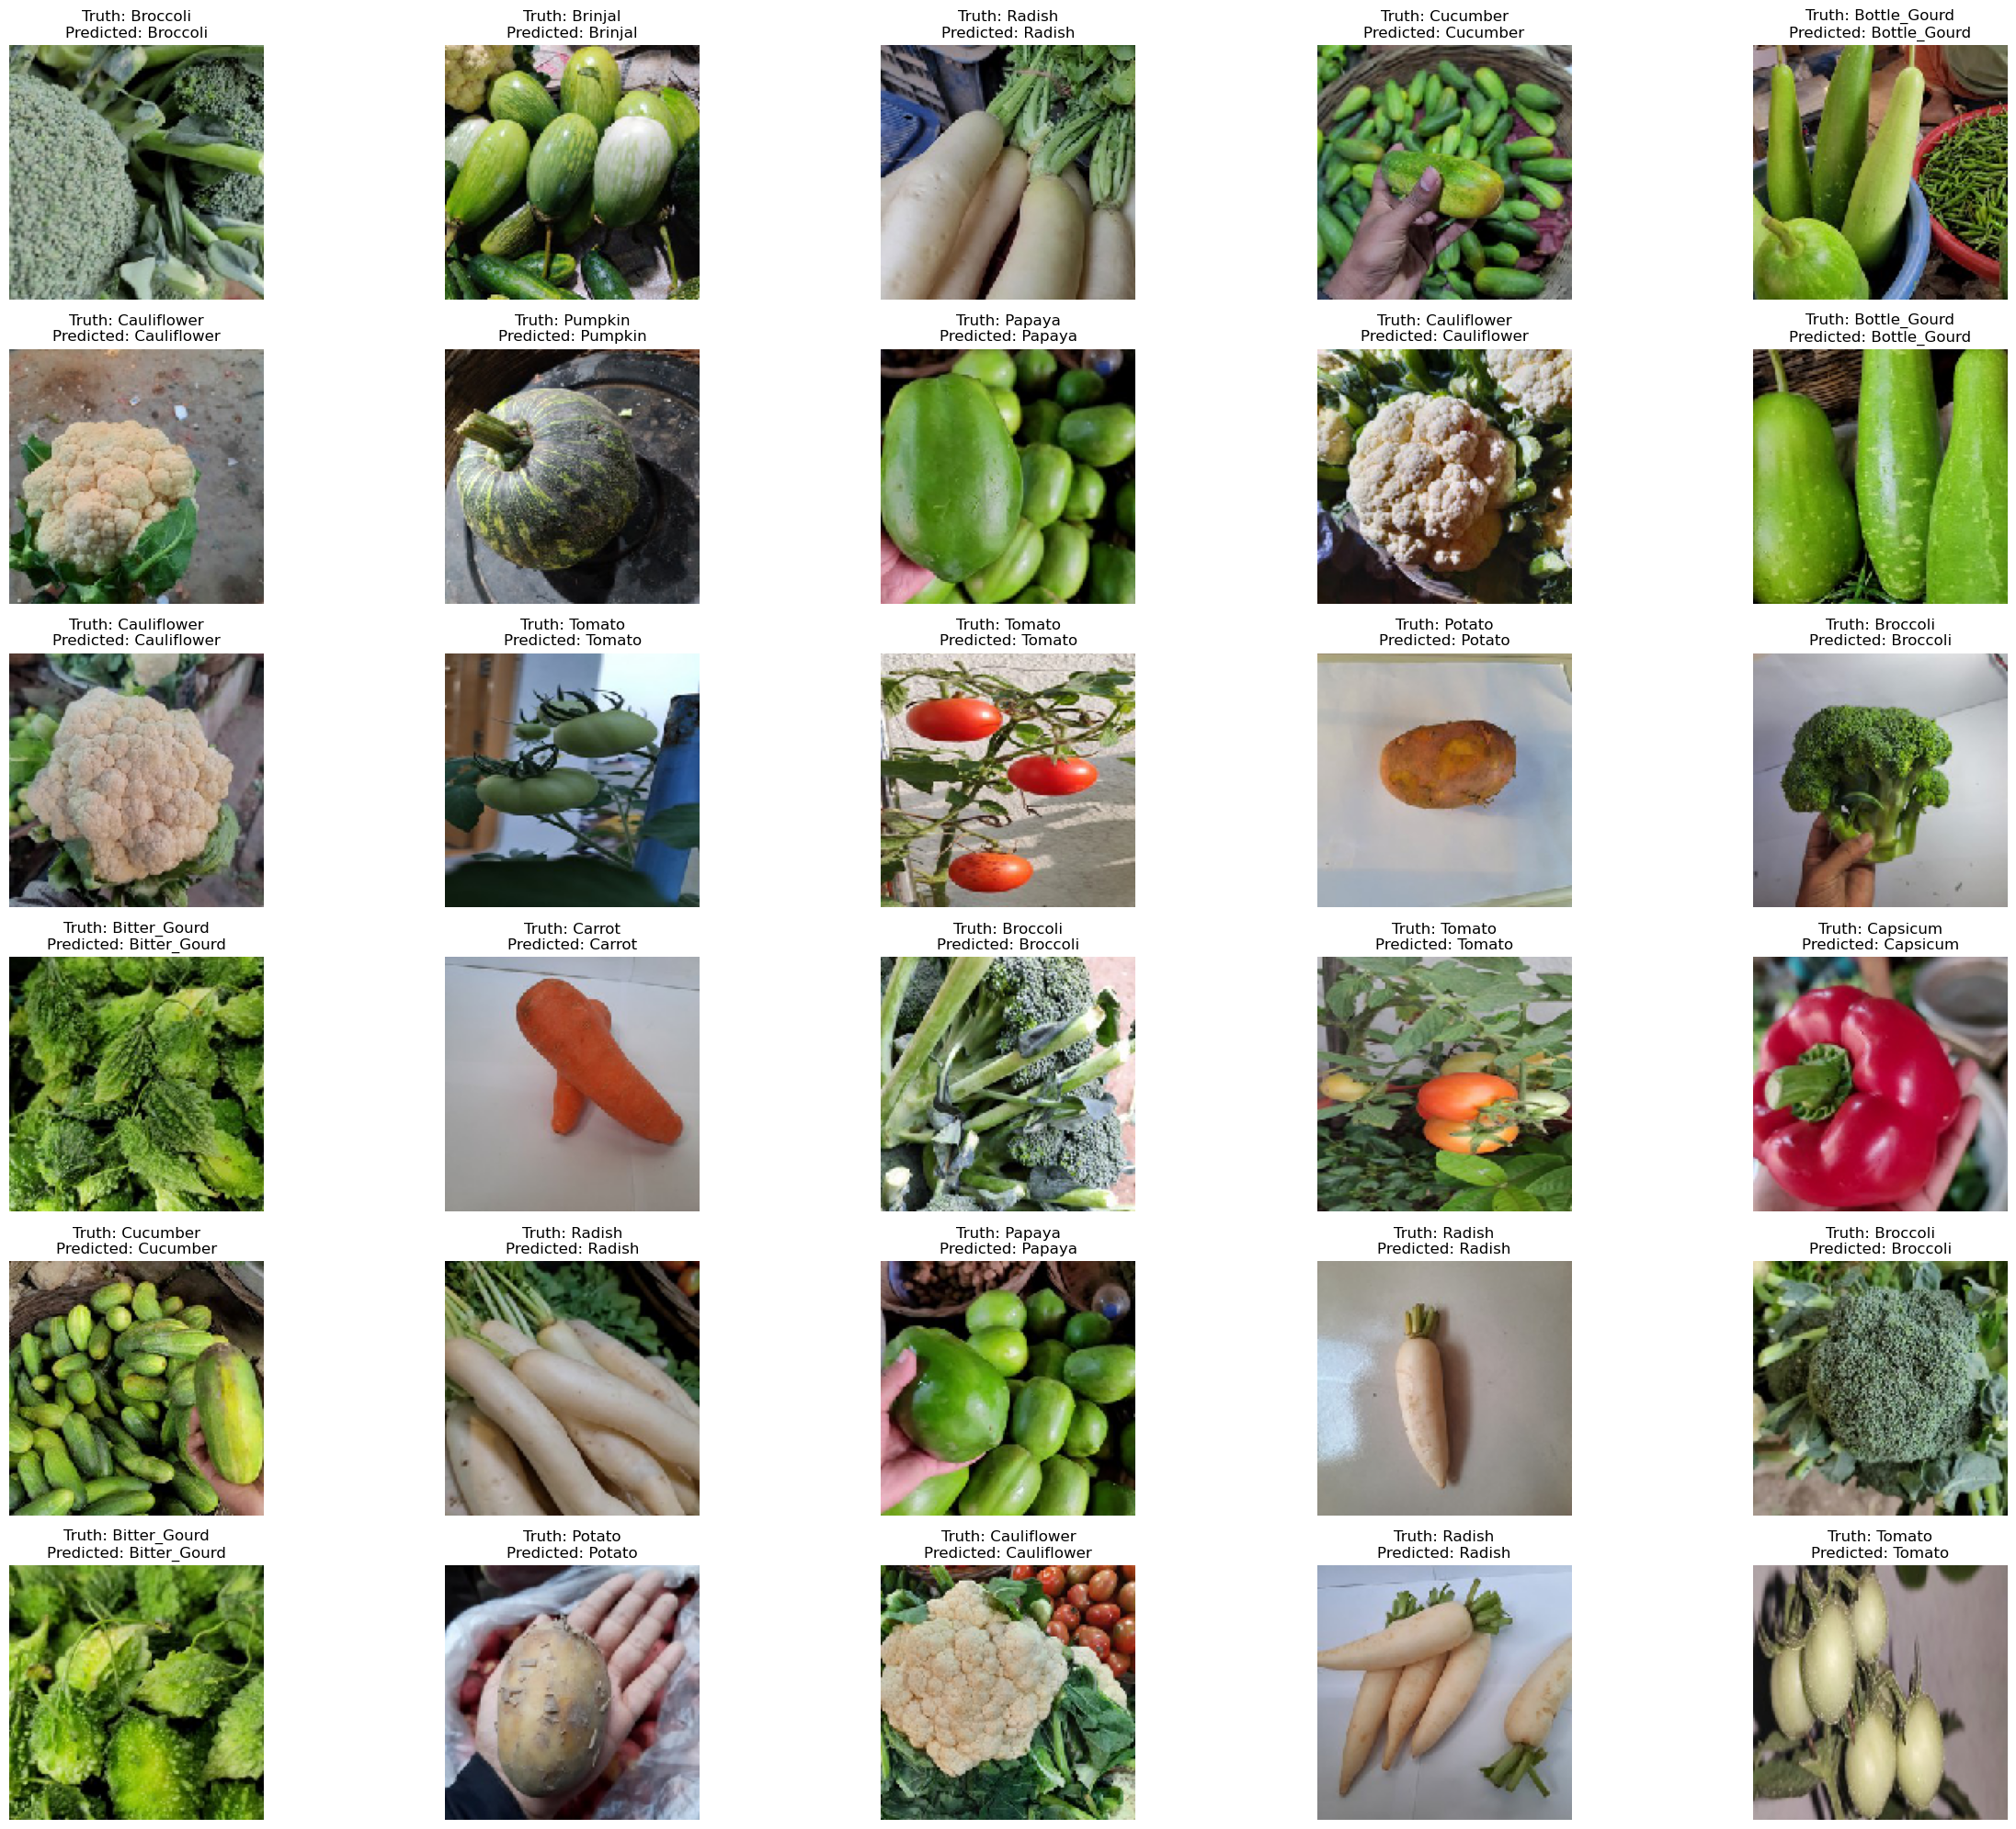

In [17]:
# Fetching the class names and visualizing predictions
t_dict = test_set.class_indices  # Dictionary of class indices
classes = list(t_dict.keys())  # List of class labels

# Create a large figure to display multiple images
plt.figure(figsize=(25, 20))

# Get a batch of test images and their true labels
images, labels = next(test_set)

# Loop through the images and display them with predictions and ground truths
for i in range(30):
    plt.subplot(6, 5, i + 1)
    img = images[i]
    img_array = np.expand_dims(img, axis=0)  # Prepare the image for prediction
    prediction = model.predict(img_array)  # Model prediction for the image
    
    # Get the true and predicted class labels
    true_class = classes[np.argmax(labels[i])]
    predicted_class = classes[np.argmax(prediction)]
    
    plt.imshow(img)  # Display the image
    plt.title(f'Truth: {true_class}\nPredicted: {predicted_class}')  # Title with true and predicted class
    plt.axis('off')  # Turn off axis labels

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot with all 30 images and predictions
plt.show()